In [9]:
import matplotlib.pyplot as plt
import operator
import copy
import numpy as np

In [10]:
def getFileTab(f):
    fp = open(f,'r')
    line = fp.readline()
    d = dict()
    i = 0
    while line:
        if not('R' in line):
            comb,val = line.split(" ") 
            d[comb]=int(val[:-1])
        line = fp.readline()
    fp.close()
    return d

In [11]:
dic = getFileTab("ResultatEval8.txt")
dic

{'0/0/0/8': 0,
 '0/0/1/7': 5,
 '0/0/2/6': 8,
 '0/0/3/5': 17,
 '0/0/4/4': 18,
 '0/0/5/3': 22,
 '0/0/6/2': 19,
 '0/0/7/1': 21,
 '0/0/8/0': 28,
 '0/1/0/7': 22,
 '0/1/1/6': 26,
 '0/1/2/5': 23,
 '0/1/3/4': 31,
 '0/1/4/3': 32,
 '0/1/5/2': 36,
 '0/1/6/1': 29,
 '0/1/7/0': 29,
 '0/2/0/6': 28,
 '0/2/1/5': 29,
 '0/2/2/4': 37,
 '0/2/3/3': 43,
 '0/2/4/2': 32,
 '0/2/5/1': 30,
 '0/2/6/0': 22,
 '0/3/0/5': 31,
 '0/3/1/4': 29,
 '0/3/2/3': 21,
 '0/3/3/2': 31,
 '0/3/4/1': 33,
 '0/3/5/0': 22,
 '0/4/0/4': 41,
 '0/4/1/3': 41,
 '0/4/2/2': 33,
 '0/4/3/1': 20,
 '0/4/4/0': 15,
 '0/5/0/3': 40,
 '0/5/1/2': 39,
 '0/5/2/1': 32,
 '0/5/3/0': 15,
 '0/6/0/2': 30,
 '0/6/1/1': 10,
 '0/6/2/0': 9,
 '0/7/0/1': 23,
 '0/7/1/0': 4,
 '0/8/0/0': 1,
 '1/0/0/7': 0,
 '1/0/1/6': 7,
 '1/0/2/5': 8,
 '1/0/3/4': 17,
 '1/0/4/3': 23,
 '1/0/5/2': 22,
 '1/0/6/1': 25,
 '1/0/7/0': 26,
 '1/1/0/6': 16,
 '1/1/1/5': 29,
 '1/1/2/4': 28,
 '1/1/3/3': 33,
 '1/1/4/2': 27,
 '1/1/5/1': 28,
 '1/1/6/0': 24,
 '1/2/0/5': 28,
 '1/2/1/4': 28,
 '1/2/2/3': 39,
 

In [12]:
def creaHistArray(dic,nmax = 100):
    
    array = []
    ar=[]
    ab=[]
    ac=[]
    ah=[]
    score = []
    while (len(dic.keys())>0 and len(score) < nmax):
        maximum = max(dic, key=dic.get) 
        r,b,c,h = maximum.split("/")
        ar.append(int(r))
        ab.append(int(b))
        ac.append(int(c))
        ah.append(int(h))
        array.append(maximum)
        score.append(dic[maximum])
        del dic[maximum]
    return array,ar,ab,ac,ah,score

In [13]:
def histogram(dic,nmax=100):
    ar,r,b,c,h,s = creaHistArray(copy.deepcopy(dic),nmax)
    header = ['Random','Bas','Complet','Haut']
    
    X_AXIS = s

    plt.rc('font', serif='Helvetica Neue')
    plt.rc('text', usetex='false')
    plt.rcParams.update({'font.size': 40})

    fig = plt.gcf()
    fig.set_size_inches(20, 7)

    configs = r
    N = len(r)
    ind = np.arange(N)
    width = 0.8
    
    bars = np.add(r, b).tolist()
    bars1 = np.add(bars,c).tolist()

    p1 = plt.bar(ind, r, width, color='r')
    p2 = plt.bar(ind, b, width, bottom=r, color='b')
    p3 = plt.bar(ind, c, width, bottom=bars, color='g')
    p4 = plt.bar(ind, h, width, bottom=bars1, color='y')

    #plt.ylim([0,120])
    plt.yticks(fontsize=12)
    plt.ylabel("Arrangement", fontsize=20)
    plt.xticks(ind, X_AXIS, fontsize=12, rotation=90)
    plt.xlabel('Score de la coalition', fontsize=12)
    plt.legend((p1[0], p2[0], p3[0], p4[0]), (header[0], header[1], header[2], header[3]), fontsize=12, ncol=4, framealpha=0, fancybox=True)
    plt.show()

['1/2/9/2', '0/4/7/3', '1/4/7/2', '0/2/9/3', '0/4/5/5', '4/2/4/4', '0/7/3/4', '0/2/11/1', '2/3/4/5', '1/6/5/2', '0/3/6/5', '1/3/8/2', '0/3/8/3', '2/3/5/4', '0/2/6/6', '0/5/5/4', '0/3/9/2', '2/7/0/5', '1/1/10/2', '0/1/12/1', '4/3/5/2', '0/0/14/0', '0/2/10/2', '1/3/4/6', '2/8/0/4', '2/4/6/2', '1/5/7/1', '0/3/10/1', '1/4/5/4', '1/2/7/4', '0/5/7/2', '0/1/7/6', '0/3/7/4', '0/1/8/5', '2/1/10/1', '0/9/0/5', '2/2/9/1', '1/5/5/3', '2/2/8/2', '1/4/6/3', '0/2/8/4', '0/1/10/3', '0/2/5/7', '1/3/6/4', '3/2/8/1', '1/5/2/6', '2/3/7/2', '0/5/8/1', '0/1/13/0', '1/3/5/5', '1/1/9/3', '3/6/2/3', '2/2/7/3', '0/4/8/2', '0/4/6/4', '1/1/8/4', '0/6/3/5', '1/4/4/5', '1/3/2/8', '2/3/6/3', '0/2/12/0', '1/0/13/0', '0/4/2/8', '1/3/3/7', '1/6/2/5', '1/5/1/7', '1/1/7/5', '1/7/4/2', '1/2/3/8', '0/1/9/4', '3/1/7/3', '0/3/5/6', '0/6/4/4', '0/0/13/1', '1/7/3/3', '2/5/1/6', '4/4/3/3', '1/9/2/2', '1/4/3/6', '0/6/2/6', '1/6/1/6', '3/1/8/2', '0/6/6/2', '3/3/4/4', '2/4/7/1', '3/2/4/5', '0/5/3/6', '2/1/9/2', '6/3/0/5', '3/6/1/4

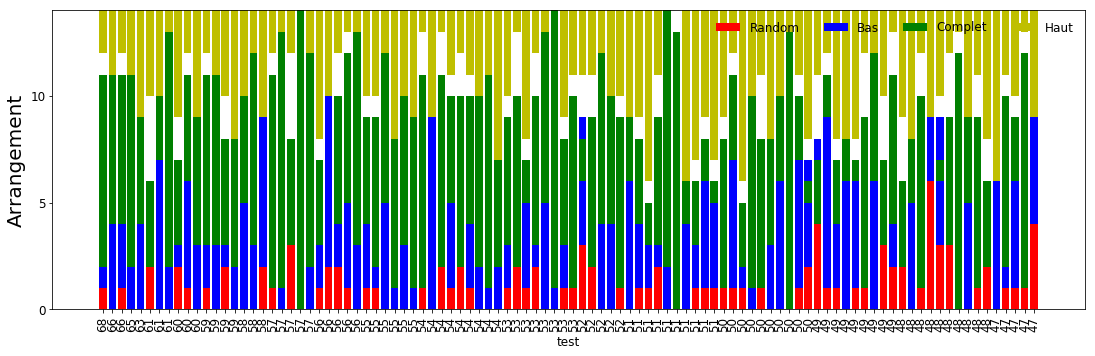

In [143]:
dic = getFileTab("ResultatEval14.txt")
histogram(dic)

In [3]:
def allGraph(i,j,nmax=100):
    for k in range(i,j+1):
        dic = getFileTab("ResultatEval"+str(k)+".txt")
        histogram(dic,nmax)

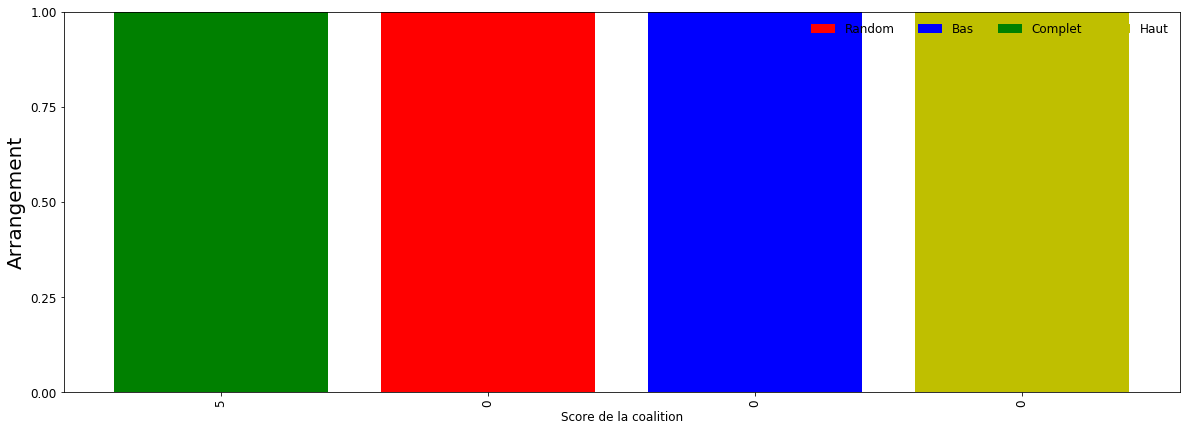

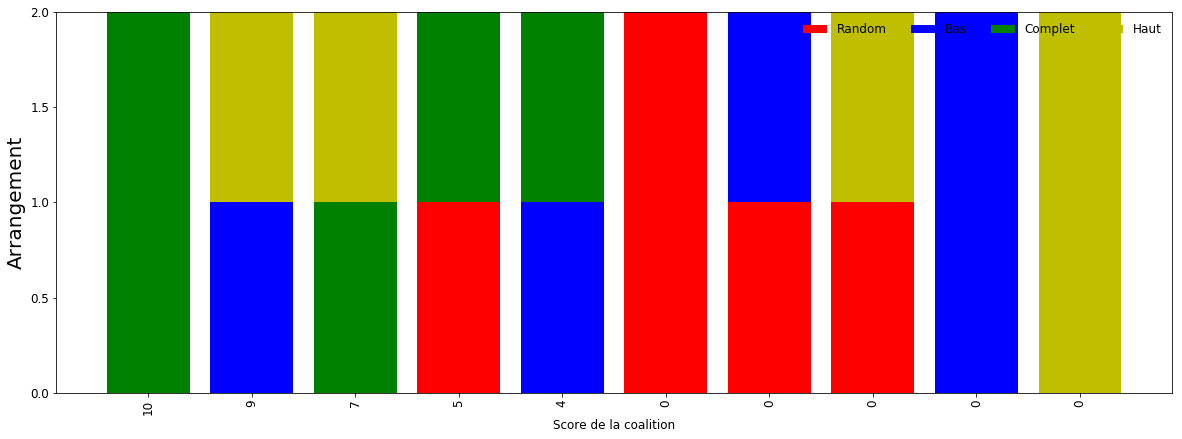

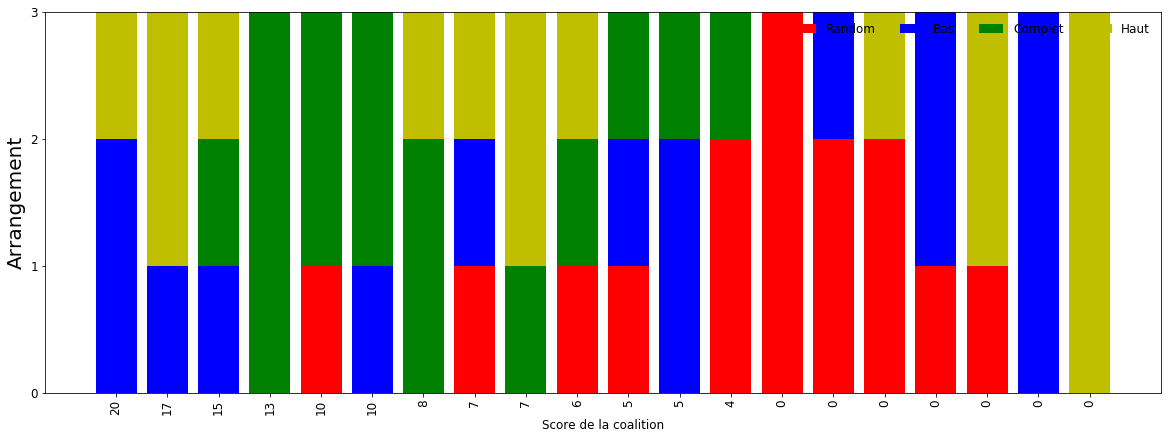

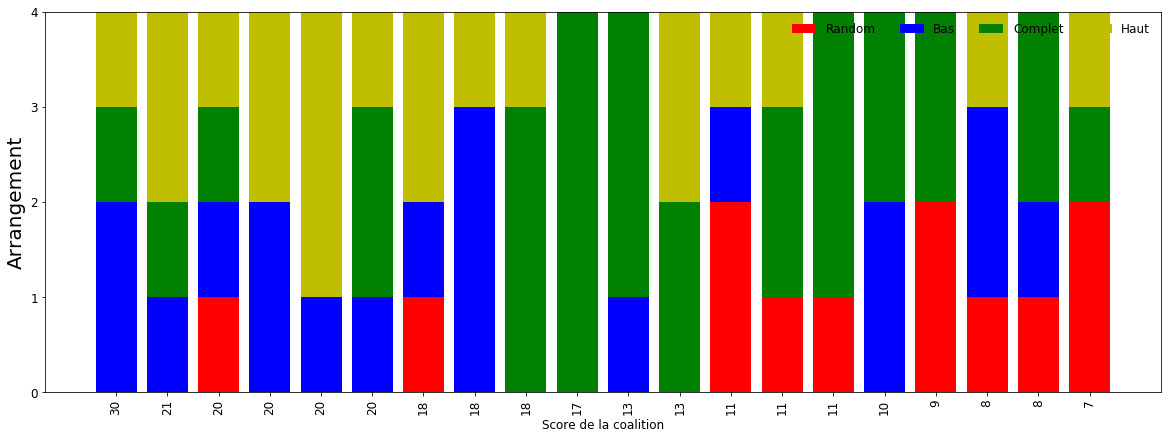

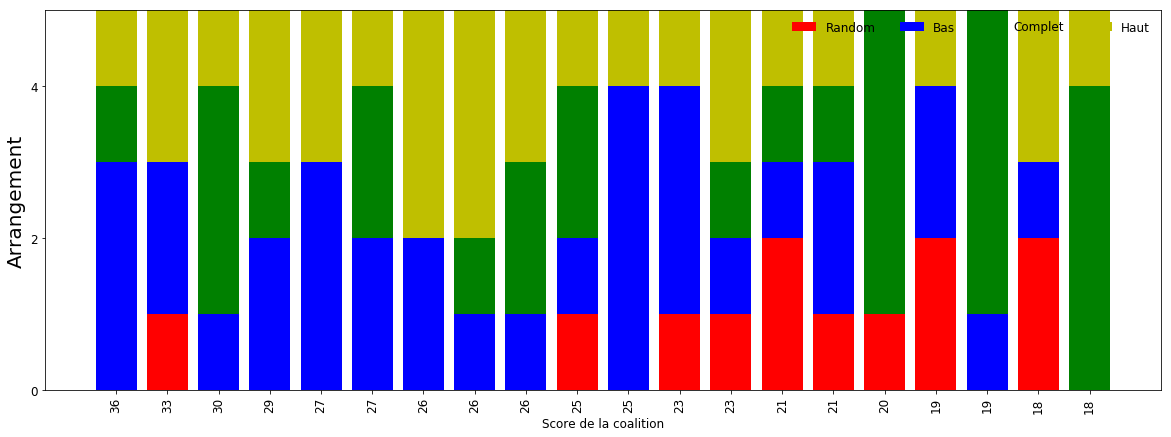

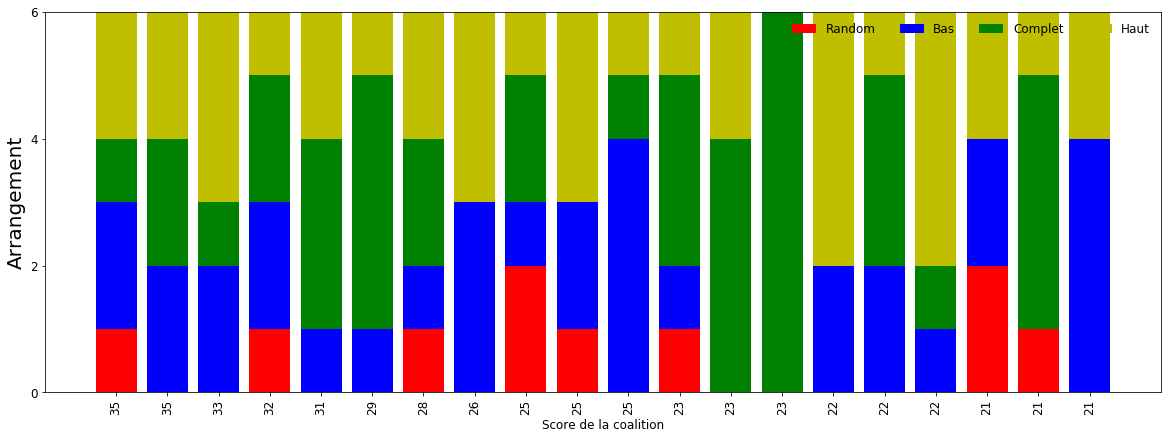

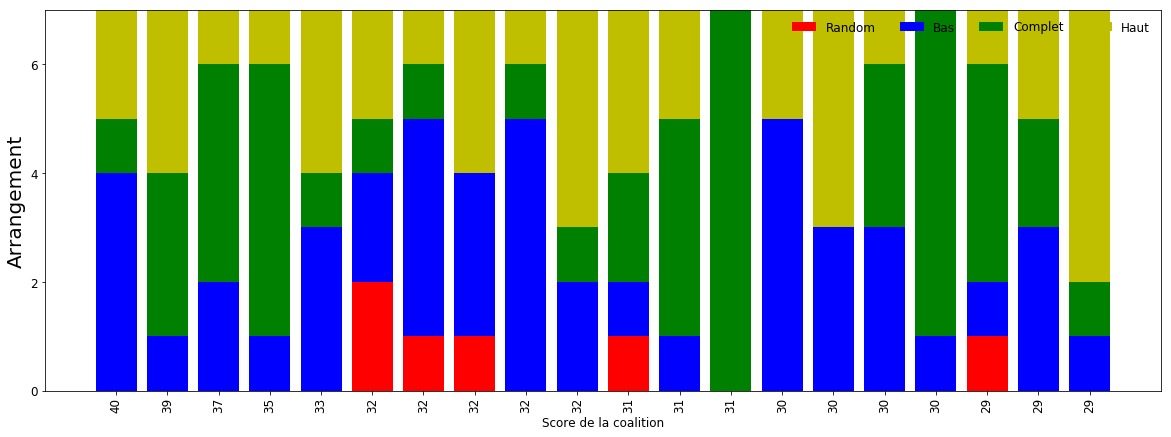

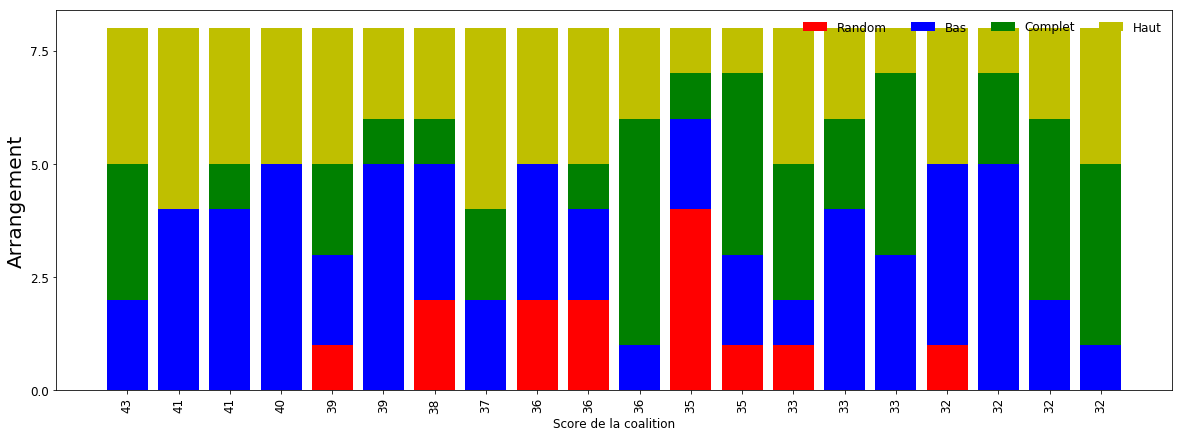

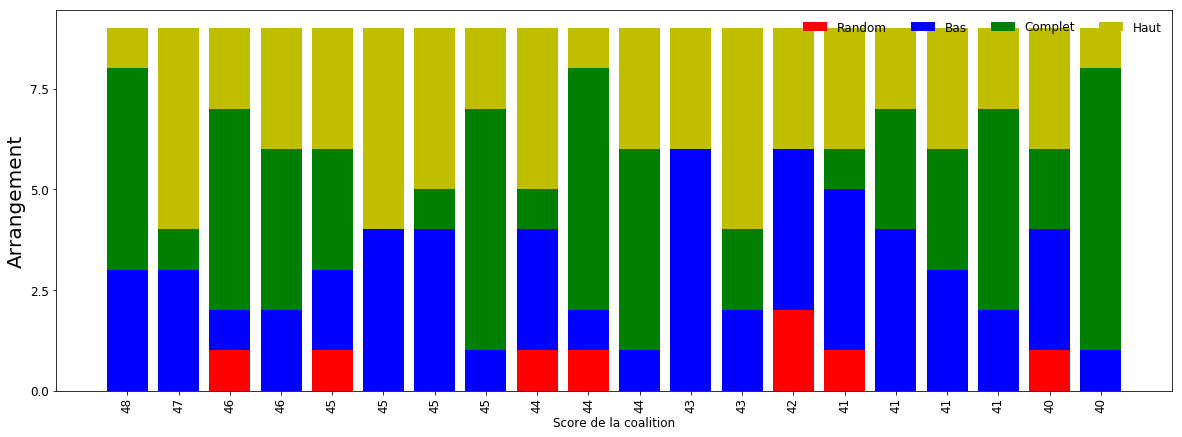

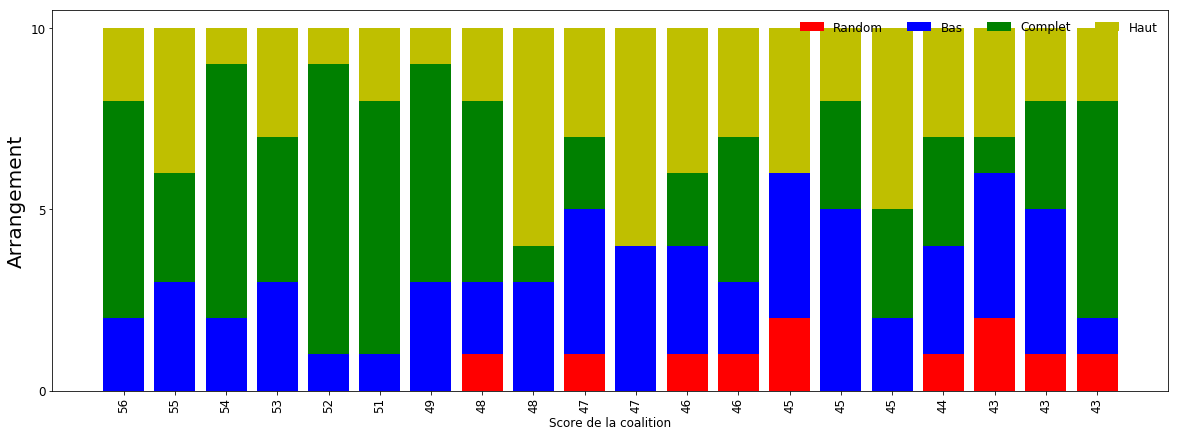

In [14]:
allGraph(1,10,20)